# **Introduction**

Sleep is a fundamental component of both physical and mental well-being. However, a significant number of individuals suffer from sleep disorders such as insomnia and sleep apnea, which negatively impact their long-term health, productivity, and quality of life. With growing access to lifestyle and health data, there is an opportunity to better understand what truly drives poor sleep quality.

# **Problem Statement/Motivation**

As a Sleep Health Management company, our goal is to leverage hospital and medical facility data to promote healthier lifestyles for our customers. Sleep plays a critical role in overall physical and mental well-being, yet many individuals suffer from disorders such as insomnia and sleep apnea that severely impact their quality of life.
Using the Sleep Health and Lifestyle Dataset from Kaggle, our project aims to analyze the relationship between sleep disorders and various demographic, occupational, and lifestyle factors. Through this analysis, we seek to identify key drivers of poor sleep quality and build a data-driven framework that can support personalized health recommendations.

# **Research Questions**
* Which demographic and lifestyle factors are most strongly associated with sleeping disorders?


* How can we translate these insights into actionable strategies for improving sleep health?


* Can we build a predictive machine learning model to identify individuals at risk of sleep disorders?


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from termcolor import colored
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sleep-health-and-lifestyle-dataset' dataset.
Path to dataset files: /kaggle/input/sleep-health-and-lifestyle-dataset


In [ ]:
file_path = '/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv'
sleep_data = pd.read_csv(file_path)

sleep_data.head()         #LOAD DATASET

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
sleep_data1 = sleep_data.copy()

# **Data Description**

Our dataset originates from the Sleep Health and Lifestyle Dataset, available on Kaggle and provided by the University of Moratuwa. It contains anonymized data on individuals’ demographic attributes, lifestyle habits, and health indicators, with a focus on understanding the relationship between sleep quality, lifestyle factors, and potential sleep disorders.
The dataset was downloaded from:
 https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
The original data were collected from self-reported surveys and simulated health records designed to represent diverse age groups and occupations. Each record represents one individual, capturing both behavioral and physiological characteristics related to sleep health.
Total Rows: 374
Total Columns (features): 13
Variable types: Numeric (continuous measures such as sleep duration, heart rate, stress level) and categorical (gender, occupation, BMI category, sleep disorder).
Target variable: Sleep Disorder — classified as None, Insomnia, or Sleep Apnea.


# **Preprocessing - Divide 'Blood Pressure' to highest and lowest**

In [ ]:
sleep_data1 = pd.concat([sleep_data, sleep_data['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)


In [ ]:
sleep_data1 = sleep_data1.rename(columns={0: 'BloodPressure_Upper_Value', 1: 'BloodPressure_Lower_Value'})

In [ ]:
sleep_data1['BloodPressure_Upper_Value'] = sleep_data1['BloodPressure_Upper_Value'].astype(float)
sleep_data1['BloodPressure_Lower_Value'] = sleep_data1['BloodPressure_Lower_Value'].astype(float)

# **Handling Categorical Variables**

In [ ]:
#import label encoder
from sklearn import preprocessing
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
sleep_data1['Gender'] = label_encoder.fit_transform(sleep_data1['Gender'])
sleep_data1['Occupation'] = label_encoder.fit_transform(sleep_data1['Occupation'])
sleep_data1['BMI Category'] = label_encoder.fit_transform(sleep_data1['BMI Category'])
sleep_data1['Sleep Disorder'] = label_encoder.fit_transform(sleep_data1['Sleep Disorder'])
sleep_data1.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,1,1,27,9,6.1,6,42,6,3,77,4200,2,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,2,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,2,125.0,80.0
3,4,1,28,6,5.9,4,30,8,2,85,3000,1,140.0,90.0
4,5,1,28,6,5.9,4,30,8,2,85,3000,1,140.0,90.0


In [ ]:
# Outlier Removal
num_col = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
           'Heart Rate', 'Daily Steps', 'BloodPressure_Upper_Value', 'BloodPressure_Lower_Value']

Q1 = sleep_data1[num_col].quantile(0.25)
Q3 = sleep_data1[num_col].quantile(0.75)
IQR = Q3 - Q1

sleep_data1 = sleep_data1[~((sleep_data1[num_col] < (Q1 - 1.5 * IQR)) | (sleep_data1[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X = sleep_data1.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = sleep_data1['Sleep Disorder']

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# Create a pipeline with data preprocessing and classification model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

In [ ]:
# Define parameter grids for hyperparameter tuning
param_grid = [
    {
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [100, 200, 300,400],
        'clf__max_depth': [None, 5, 10,15],
    },
    {
        'clf': [SVC()],
        'clf__kernel': ['linear', 'rbf'],
        'clf__C': [0.01,0.1, 1, 10],
    },
    {
        'clf': [LogisticRegression()],
        'clf__solver': ['liblinear', 'lbfgs'],
        'clf__C': [0.01,0.1, 1, 10],
    },
    {
        'clf': [KNeighborsClassifier()],
        'clf__n_neighbors': [3, 5, 7,9],
    },
    {
        'clf': [GradientBoostingClassifier()],
        'clf__n_estimators': [100, 200, 300,400],
        'clf__learning_rate': [0.01, 0.1, 1],
    },
    {
        'clf': [DecisionTreeClassifier()],
        'clf__max_depth': [None, 5, 10,15],
    }
]

In [ ]:
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Calculate accuracy scores for each model
models = [
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Decision Tree', DecisionTreeClassifier())
]
accuracy_scores = []
for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

In [ ]:
# Comparison Chart
import plotly.graph_objects as go

models = [("RandomForest", 0.9166), ("SVM", 0.903), ("LogisticRegression", 0.903),
          ("KNN", 0.875), ("GradientBoosting", 0.931), ("DecisionTree", 0.917)]
accuracy_scores = [score for _, score in models]


fig = go.Figure(data=go.Bar(
    x=[name for name, _ in models],
    y=accuracy_scores,
    marker=dict(color=accuracy_scores, colorscale='Viridis', showscale=True)
))


fig.update_layout(
    title='Comparison of Models',
    title_font_size=24,
    xaxis=dict(
        title='Models',
        tickangle=45,
        title_font_size=18,
        tickfont_size=14
    ),
    yaxis=dict(
        title='Accuracy Score',
        title_font_size=18,
        tickfont_size=14
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(255, 255, 255, 0.9)',
    barmode='group',
    margin=dict(l=40, r=40, t=40, b=60),
    hovermode='x unified',
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    showlegend=False
)


fig.show()

Of all the ML models, GradientBoosting has the highest accuracy of 93%, while Decision Tree has the second highest of 91%.

In [ ]:
# Feature Importance
importance = best_model.named_steps['clf'].feature_importances_
feature_names = X.columns

sorted_indices = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_indices]
sorted_features = feature_names[sorted_indices]

fig = go.Figure(data=go.Bar(
    x=sorted_features,
    y=sorted_importance,
    marker=dict(color=sorted_importance, colorscale='Viridis', showscale=True)
))

fig.update_layout(
    title='Feature Importance',
    title_font_size=24,
    xaxis=dict(
        title='Features',
        tickangle=45,
        title_font_size=18,
        tickfont_size=14
    ),
    yaxis=dict(
        title='Importance',
        title_font_size=18,
        tickfont_size=14
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(255, 255, 255, 0.9)',
    margin=dict(l=40, r=40, t=40, b=60),
    hovermode='x unified',
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    showlegend=False
)


fig.show()


As seen in the chart above, BMI Category is the strongest indicator in predicting whether a person has a sleeping disorder. The other runner ups were blood pressure, occupation, and age. What suprises me about this chart is how sleep duration doesn't affect as much as I thought it will, since it is one of the few categories that seems directly related to sleep.

# Sleep Duration Distribution by Occupation

/tmp/ipython-input-701146259.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




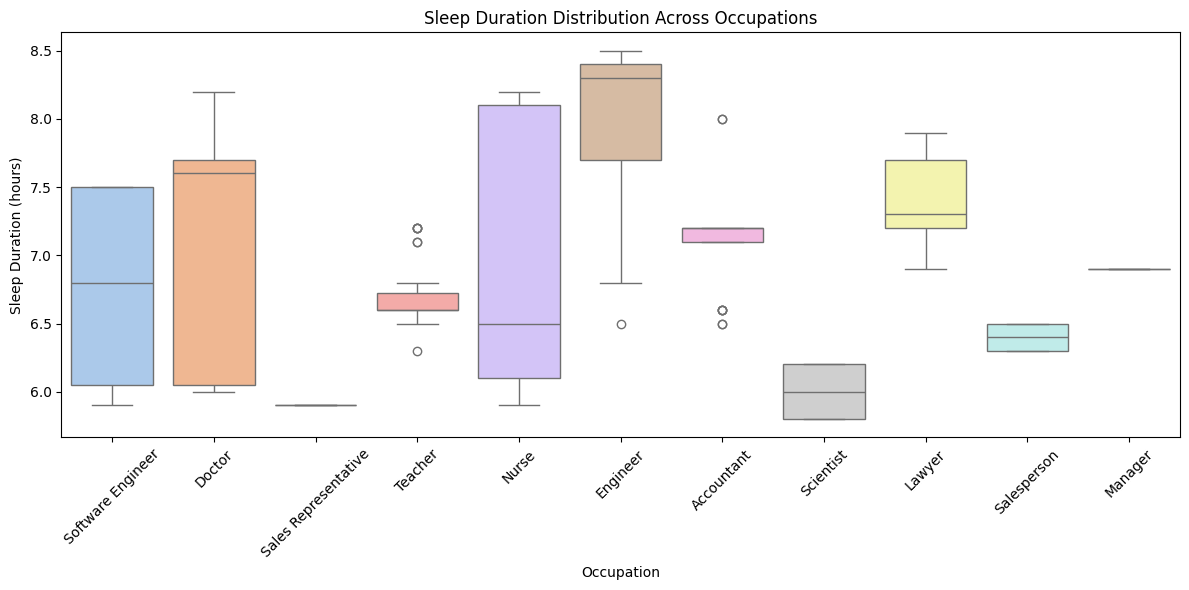

In [ ]:
# Visualization 1: Sleep Duration Distribution by Occupation
plt.figure(figsize=(12, 6))
sns.boxplot(data=sleep_data, x="Occupation", y="Sleep Duration", palette="pastel")
plt.xticks(rotation=45)
plt.title("Sleep Duration Distribution Across Occupations")
plt.xlabel("Occupation")
plt.ylabel("Sleep Duration (hours)")
plt.tight_layout()
plt.show()


/tmp/ipython-input-312500444.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




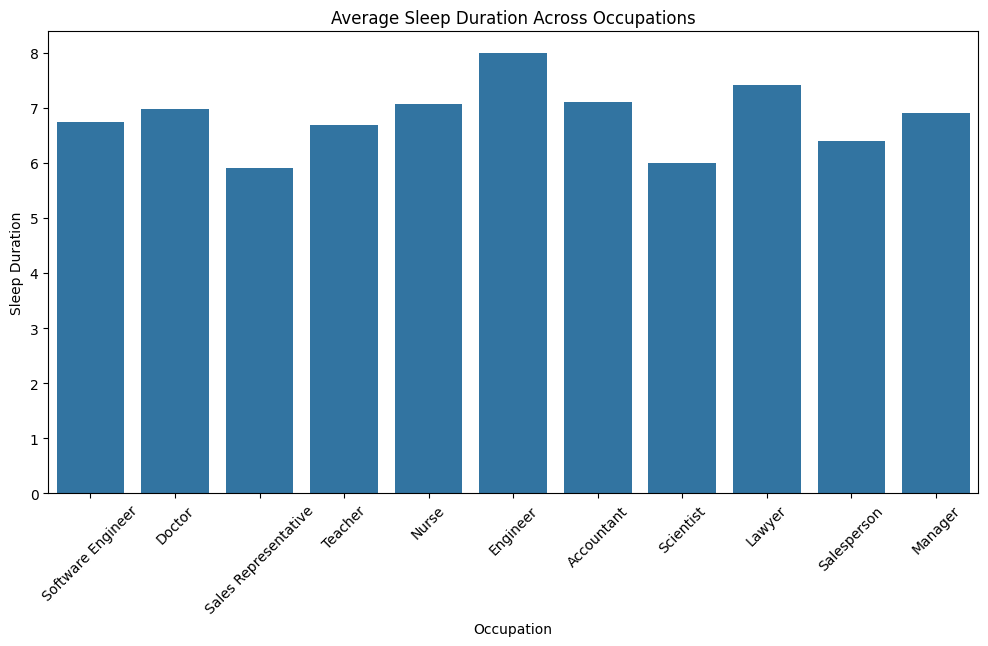

In [ ]:
#plt.figure(figsize=(12,6))
#sns.barplot(data=sleep_data, x="Occupation", y="Sleep Duration", estimator=np.mean, ci=None)
#plt.xticks(rotation=45)
#plt.title("Average Sleep Duration Across Occupations")
#plt.show()


# Correlation Heatmap of Numeric Features

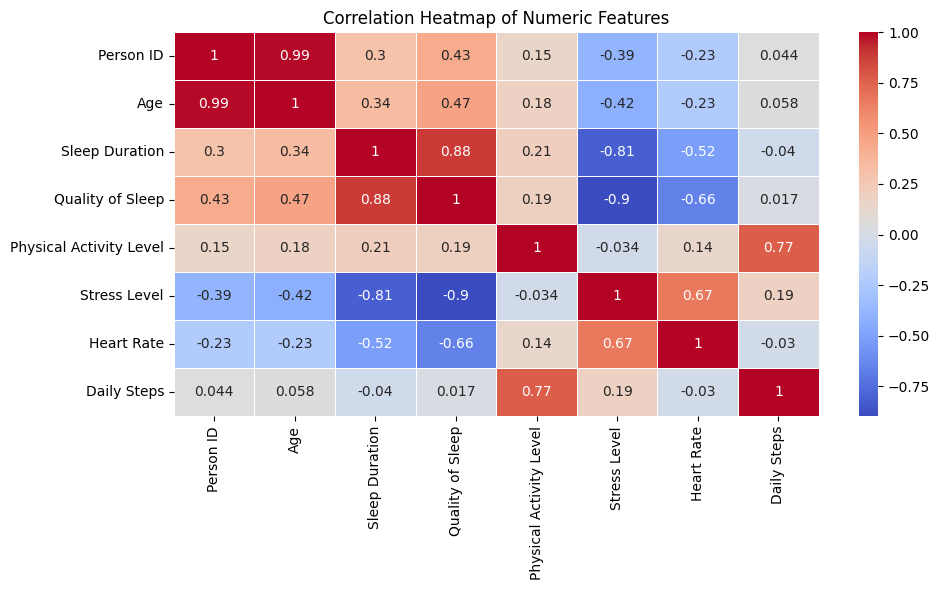

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
numeric_cols = sleep_data.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


# Stress Level vs Sleep Disorder

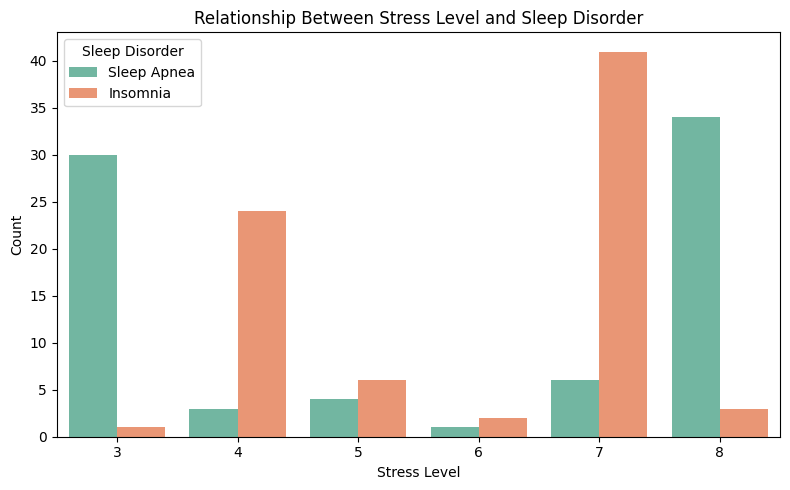

In [ ]:
# Stress Level vs Sleep Disorder
plt.figure(figsize=(8, 5))
sns.countplot(data=sleep_data, x="Stress Level", hue="Sleep Disorder", palette="Set2")
plt.title("Relationship Between Stress Level and Sleep Disorder")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Effects of Caffeine Intake on Sleep

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
synthetic_data = pd.DataFrame({
    'Person ID': sleep_data['Person ID'],
    'Caffeine_Intake_mg': np.random.normal(180, 60, len(sleep_data)).clip(0),
    'Screen_Time_hrs': np.random.normal(5, 1.5, len(sleep_data)).clip(1),
    'Work_Hours': np.random.normal(8.5, 1.2, len(sleep_data)).clip(4),
})

merged_data = sleep_data.merge(synthetic_data, on='Person ID')
merged_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Caffeine_Intake_mg,Screen_Time_hrs,Work_Hours
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,209.802849,8.229774,7.766179
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,171.704142,3.848979,6.812007
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,218.861312,6.308481,7.392120
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,271.381791,5.275013,6.877978
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,165.950798,8.284704,7.328952


In this step, we create a synthetic lifestyle dataset containing caffeine intake, screen time, and work hours for each person. These extra variables help us explore new relationships not present in the original sleep dataset. We then merge this generated dataset with the main sleep dataset using Person ID so all variables can be analyzed together.

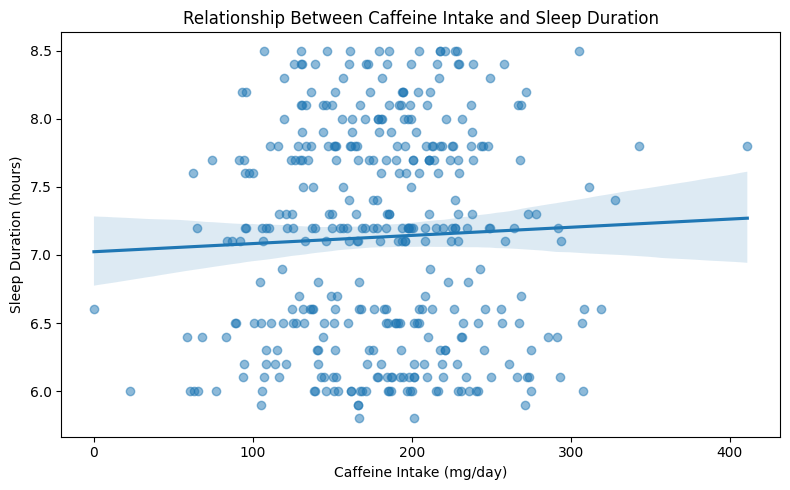

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot(data=merged_data, x='Caffeine_Intake_mg', y='Sleep Duration', scatter_kws={'alpha':0.5})
plt.title("Relationship Between Caffeine Intake and Sleep Duration")
plt.xlabel("Caffeine Intake (mg/day)")
plt.ylabel("Sleep Duration (hours)")
plt.tight_layout()
plt.show()

This scatterplot shows whether people who consume more caffeine tend to sleep less.
We use a regression line to highlight the overall trend.
This explores a new behavioral angle that was not part of the original lab.

The scatterplot shows that caffeine intake does not have a strong or consistent relationship with sleep duration. Although the trend line slopes slightly upward, the effect is very mild and the data points are widely spread. This suggests that caffeine intake alone is not a strong predictor of how long a person sleeps in this dataset. Most people, regardless of caffeine levels, cluster around 6.5 to 7.5 hours of sleep.

/tmp/ipython-input-2490953556.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




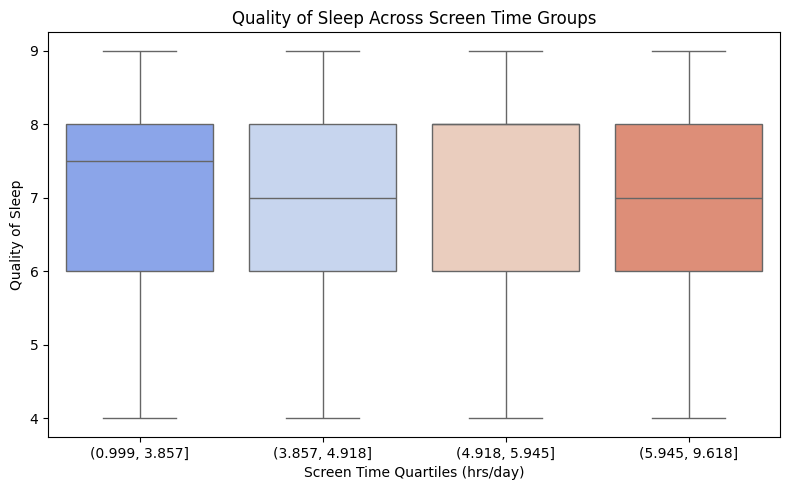

In [ ]:
# Screen Time vs Quality of Sleep
plt.figure(figsize=(8,5))
sns.boxplot(data=merged_data, x=pd.qcut(merged_data['Screen_Time_hrs'], 4), y='Quality of Sleep', hue= None, palette='coolwarm')
plt.title("Quality of Sleep Across Screen Time Groups")
plt.xlabel("Screen Time Quartiles (hrs/day)")
plt.ylabel("Quality of Sleep")
plt.tight_layout()
plt.show()


We group screen-time into 4 quartiles and compare sleep quality across them. This helps identify whether heavier digital consumption is linked with poorer sleep quality.

Across the four screen-time quartiles, the median quality of sleep remains fairly similar. The interquartile ranges overlap heavily, showing that higher screen time does not drastically reduce sleep quality in this sample. However, the lowest-screen-time group displays slightly higher upper-range values, hinting that people with less screen exposure may experience more consistently high sleep quality.

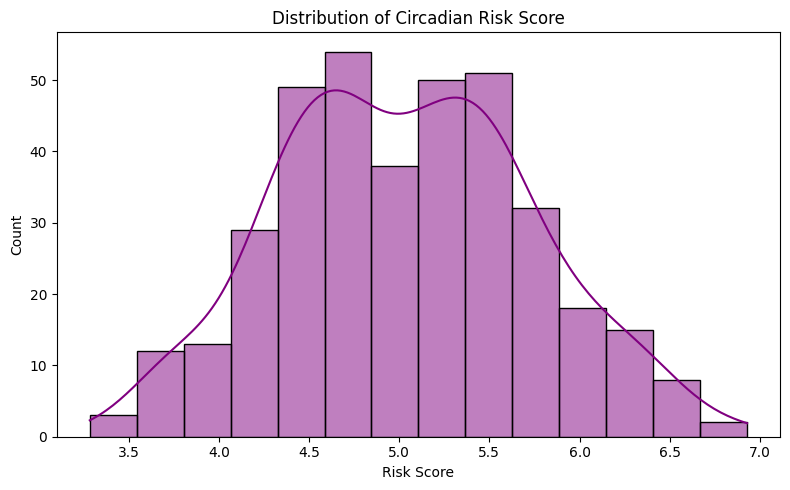

In [ ]:
# Circadian Risk Score
merged_data['Circadian_Risk_Score'] = (
    0.3 * merged_data['Stress Level'] +
    0.25 * (merged_data['Caffeine_Intake_mg'] / 100) +
    0.25 * merged_data['Screen_Time_hrs'] +
    0.2 * merged_data['Work_Hours']
)

plt.figure(figsize=(8,5))
sns.histplot(merged_data['Circadian_Risk_Score'], kde=True, color='purple')
plt.title("Distribution of Circadian Risk Score")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Circadian Risk Score = 0.3Stress + 0.25Caffeine + 0.25ScreenTime + 0.2WorkHours

We construct a Circadian Risk Score, a composite metric that reflects how lifestyle factors may disrupt circadian rhythms. The histogram shows how these risks are distributed among participants.

The circadian risk score appears to follow a roughly normal distribution centered around moderate risk levels. Most individuals fall between scores of 4.5 and 6.0, suggesting that lifestyle stressors such as caffeine, screen exposure, and work hours affect a large portion of participants at similar levels. Only a small number of people fall into very low or very high risk categories.

/tmp/ipython-input-188458155.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




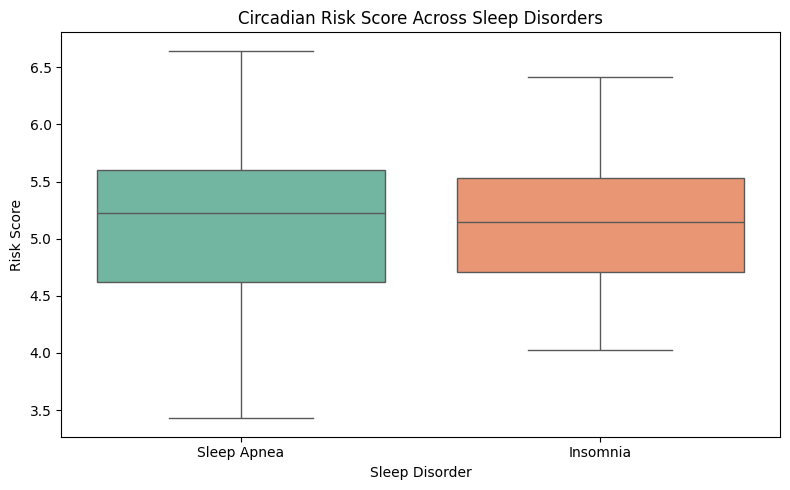

In [ ]:
# Circadian Risk vs Sleep Disorder
plt.figure(figsize=(8,5))
sns.boxplot(data=merged_data, x='Sleep Disorder', y='Circadian_Risk_Score', palette='Set2')
plt.title("Circadian Risk Score Across Sleep Disorders")
plt.xlabel("Sleep Disorder")
plt.ylabel("Risk Score")
plt.tight_layout()
plt.show()

This plot compares circadian risk across groups:

* No disorder

* Sleep apnea

* Insomnia

This allows us to see whether certain disorders tend to appear in people with higher lifestyle-related circadian risks.

Both sleep disorder groups show similar circadian risk scores, with overlapping distributions. Insomnia appears slightly more concentrated at the higher end of the risk range, while sleep apnea shows more variation and a few lower-risk individuals. Overall, this suggests that lifestyle-based circadian risk factors may influence insomnia slightly more, but do not strongly separate the two disorder groups.

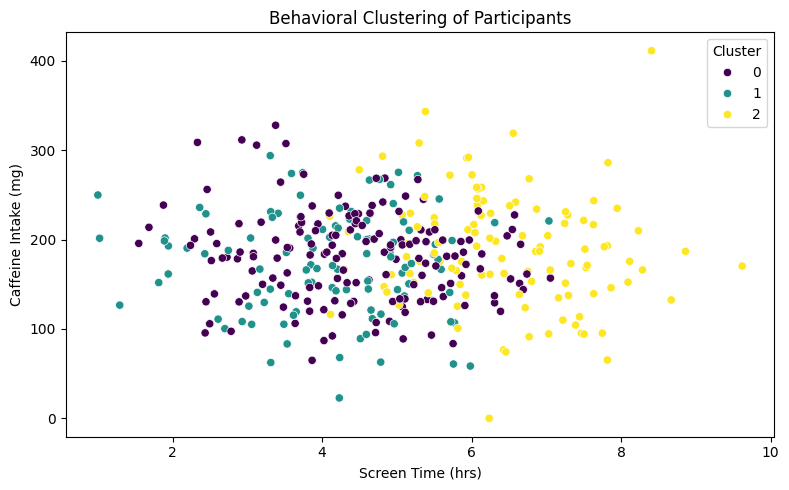

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cluster_features = merged_data[['Caffeine_Intake_mg','Screen_Time_hrs','Work_Hours','Stress Level']]
scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_features)

kmeans = KMeans(n_clusters=3, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(scaled)

plt.figure(figsize=(8,5))
sns.scatterplot(data=merged_data, x='Screen_Time_hrs', y='Caffeine_Intake_mg',
                hue='Cluster', palette='viridis')
plt.title("Behavioral Clustering of Participants")
plt.xlabel("Screen Time (hrs)")
plt.ylabel("Caffeine Intake (mg)")
plt.tight_layout()
plt.show()

Here we identify behavior-based clusters, for example:

Cluster 0: high stress + high caffeine + low sleep

Cluster 1: moderate lifestyle habits

Cluster 2: low risk, healthy routine

This helps reveal different behavioral profiles in the dataset.

The clustering reveals three distinct lifestyle behavior groups. One cluster is associated with higher screen time and higher caffeine intake, showing a concentrated group of high-stimulation individuals. Another cluster consists mostly of people with moderate habits, and the final cluster contains individuals with lower screen exposure and lower caffeine use. This separation shows that participants tend to form clear lifestyle patterns that can be grouped meaningfully.

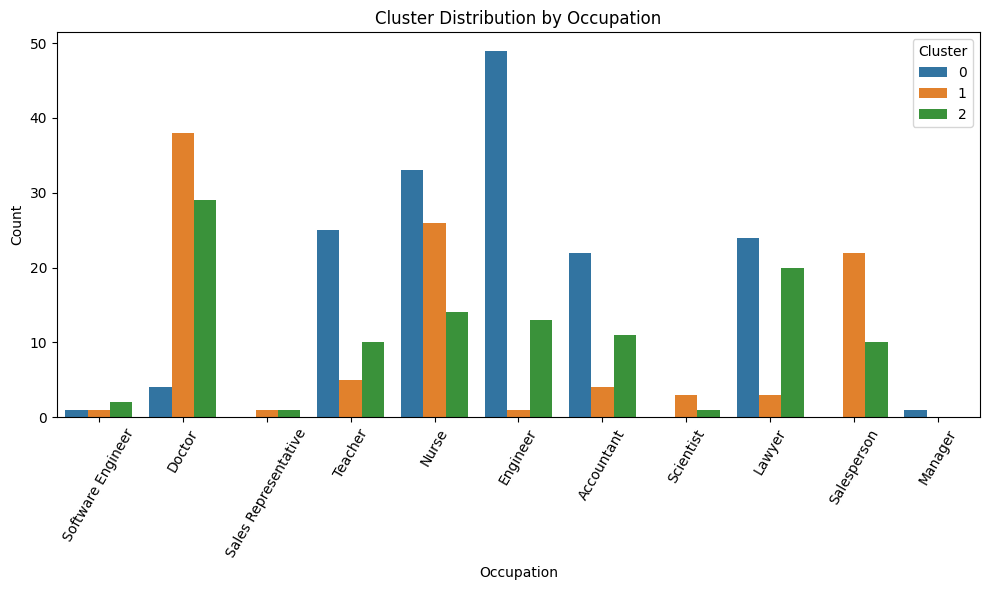

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=merged_data, x='Occupation', hue='Cluster', palette='tab10')
plt.xticks(rotation=60)
plt.title("Cluster Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


We examine which professions fall into high-stress or high-risk behavioral clusters. This uncovers trends like whether engineers, doctors, or salespeople tend to belong to riskier lifestyle groups.

Occupations differ noticeably in how they fall into lifestyle clusters. Roles like doctors and nurses show heavier representation in the higher-risk cluster, likely reflecting demanding schedules and stress. Engineers and teachers appear mostly in moderate-risk clusters, while lawyers and salespeople show a wide spread across all three clusters. This indicates that lifestyle patterns may be partly shaped by the nature of each job and its daily demands.